# Анализ полученных фич

с использованием модуля feature_selector
https://proglib.io/p/feature-selector/

In [1]:
from feature_selector import FeatureSelector
import pandas as pd

In [2]:
#загружаем датасет
data = pd.read_csv('data4ml.csv')
data_source = pd.read_csv('data.csv')

In [3]:
columns = list(set(data.columns) - set(['target']))
X = data[columns]
y = data['target']

columns_source = list(set(data_source.columns) - set(['target']))
X_source = data_source[columns_source]
y_source = data_source['target']

In [4]:
# Признаки - в train, метки - в train_labels
fs = FeatureSelector(data = X, labels = y)
fs_source = FeatureSelector(data = X_source, labels = y_source)

## Пропущенные значения

In [5]:
print('Обработанный датасет')
fs.identify_missing(missing_threshold = 0.6)
print('Исходный датасет')
fs_source.identify_missing(missing_threshold = 0.6)

Обработанный датасет
0 features with greater than 0.60 missing values.

Исходный датасет
4 features with greater than 0.60 missing values.



In [6]:
#посмотрим, в каких столбцах исходного датасета много пропущенных значений
fs_source.missing_stats.head(4)

,missing_fraction
private pool,0.988915
mls-id,0.933873
PrivatePool,0.893127
fireplace,0.726620


### Вывод
Удалять данные столбцы не нужно, так как в них пропущенные значения говорят о том, что эта характеристика отсутствует в доме.
Все пропущенные значения обработаны

## Коллинеарные признаки

In [7]:
print('Обработанный датасет')
fs.identify_collinear(correlation_threshold = 0.98)
print('Исходный датасет')
fs_source.identify_collinear(correlation_threshold = 0.98)

Обработанный датасет
8 features with a correlation magnitude greater than 0.98.

Исходный датасет
0 features with a correlation magnitude greater than 0.98.



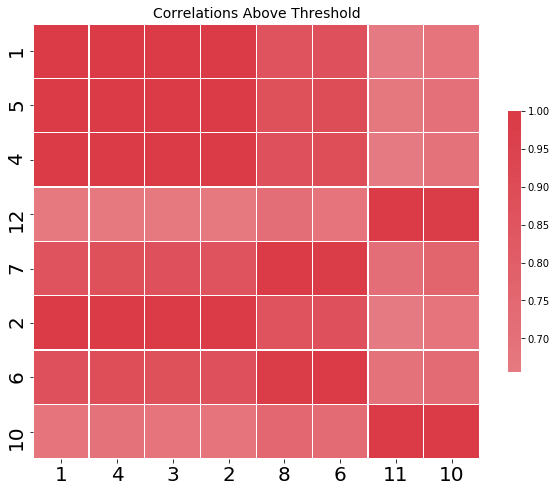

In [8]:
#Посмотрим на то, какие же признаки в обработанном датасете слишком взаимосвязаны
fs.plot_collinear()

### Вывод
В исходном датасете определить взаимосвязь признаков нельзя, так как они представляют собой не числовые данные
В обработанном датасете получились сильно взаимосвязаны данные по классам школ, что логично, так как школы все-таки содержат в себе несколько классов обучения.
Удалять столбцы не будем.

## Признаки с нулевой важностью

In [9]:
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'l2', 
                            n_iterations = 10, 
                            early_stopping = False)

zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



## Признаки с низкой важностью

In [10]:
fs.identify_low_importance(cumulative_importance = 0.99)

36 features required for cumulative importance of 0.99 after one hot encoding.
10 features do not contribute to cumulative importance of 0.99.



In [11]:
#эти признаки предлагается удалить (10 штук)
fs.feature_importances.tail(10)

,feature,importance,normalized_importance,cumulative_importance
36,2,56.0,0.001867,0.990800
37,fireplace_y_n,53.0,0.001767,0.992567
38,Heating,50.0,0.001667,0.994233
39,rent_sale,48.0,0.001600,0.995833
40,1,34.0,0.001133,0.996967
41,fp_count,24.0,0.000800,0.997767
42,4,23.0,0.000767,0.998533
43,11,20.0,0.000667,0.999200
44,10,14.0,0.000467,0.999667
45,3,10.0,0.000333,1.000000


In [12]:
#удалим признаки и сохраним новый датасет в отдельный файл
train_removed = fs.remove(methods = ['low_importance'])
train_removed['target'] = y

Removed 10 features.


In [13]:
train_removed.to_csv('data4ml_2.csv', encoding='utf-8', index=False)

In [14]:
train_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374365 entries, 0 to 374364
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   5                    374365 non-null  float64
 1   stories_count        374365 non-null  float64
 2   9                    374365 non-null  float64
 3   Remodeled            374365 non-null  int64  
 4   beds_square          374365 non-null  float64
 5   12                   374365 non-null  float64
 6   7                    374365 non-null  float64
 7   PK                   374365 non-null  float64
 8   6                    374365 non-null  float64
 9   Year                 374365 non-null  int64  
 10  Cooling              374365 non-null  int64  
 11  prop_type            374365 non-null  int64  
 12  schools_count        374365 non-null  float64
 13  state_encoding       374365 non-null  int64  
 14  8                    374365 non-null  float64
 15  price_sqft       